In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [181]:
zoo=pd.read_csv("Zoo.csv")

In [182]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [183]:
data1=zoo.drop(['animal name'],axis=1)
data1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [184]:
array=data1.values

In [185]:
array

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 4],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 7],
       [0, 1, 1, ..., 0, 0, 2]], dtype=int64)

In [186]:
X=array[:,1:16]
X

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0]], dtype=int64)

In [187]:
Y=array[:,16]

In [188]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [189]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [190]:
model=KNeighborsClassifier(n_neighbors=10)
results=cross_val_score(model,X,Y,cv=10)

C:\Users\abc\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [191]:
results.mean()

0.761818181818182

In [192]:
k_range= range(1,40,2)
k_scores=[]
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    scores=accuracy_score(pred,y_test)
    k_scores.append(scores)

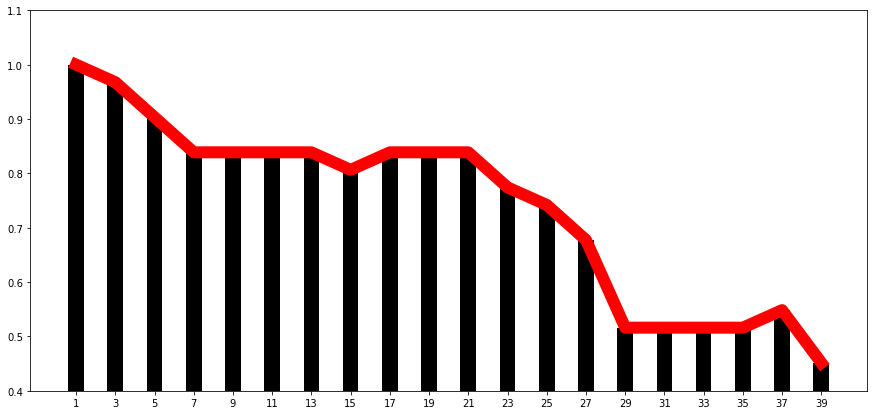

In [193]:
plt.figure(figsize=(15,7))
plt.plot(k_range,k_scores,color='red',linewidth=12)
plt.bar(k_range,k_scores,color='black')
plt.ylim(0.4,1.1)
plt.xticks(k_range)
plt.show()